<a href="https://colab.research.google.com/github/svihang8/url-classification/blob/main/url_classfication_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Old Stuff


We are not given enough features in the dataset. So we will have to create some features. We can use of the urllib library to parse each url and create features.

url_length : the total length of the url

In [ ]:
def url_length(url) -> int:
  if pd.isna(url):
    return 0
  return len(str(url))

def url_scheme(url) -> str:
  if pd.isna(url):
    return ""
  return urlparse(url).scheme

def url_netloc(url) -> str:
  if pd.isna(url):
    return ""
  return urlparse(url).netloc

def url_hostname(url) -> str:
  if pd.isna(url):
    return ""
  return urlparse(url).hostname

def url_port(url) -> str:
  if pd.isna(url):
    return ""
  return urlparse(url).port

def url_path(url) -> str:
  if pd.isna(url):
    return ""
  return urlparse(url).path

def url_params(url) -> str:
  if pd.isna(url):
    return ""
  return urlparse(url).params

def url_query(url) -> str:
  if pd.isna(url):
    return ""
  return urlparse(url).query

def url_fragment(url) -> str:
  if pd.isna(url):
    return ""
  return urlparse(url).fragment

def url_domain(url) -> str:
  if pd.isna(url):
    return ""
  return tldextract.extract(url).domain

def url_subdomain(url) -> str:
  if pd.isna(url):
    return ""
  return tldextract.extract(url).subdomain

def url_is_private(url) -> bool:
  if pd.isna(url):
    return False
  return tldextract.extract(url).is_private

def url_suffix(url) -> str:
  if pd.isna(url):
    return ""
  return tldextract.extract(url).suffix

Below are potential features that we may end up using

In [ ]:
data['url_length'] = data['url'].apply(url_length)
data['url_scheme'] = data['url'].apply(url_scheme)
data['url_netloc'] = data['url'].apply(url_netloc)
data['url_netloc_has_ip'] = data['url_netloc'].apply(lambda x : any(i.isdigit() for i in str(x) ))
data['url_netloc_length'] = data['url_netloc'].apply(url_length)
data['url_hostname'] = data['url'].apply(url_hostname)
data['url_hostname_length'] = data['url_hostname'].apply(url_length)
safe_ports = [80, 443, 22, 53]
unsafe_ports = [21, 23, 25, 1080, 3128, 8080, 8888, 3306, 3389, 445, 6660, 6669, 4444]
def classify_port(port) -> str:
  if pd.isna(port):
    return ""
  port = int(port)
  if port in safe_ports:
    return "safe"
  elif port in unsafe_ports or port >= 10000:
    return "unsafe"
  else:
    return ""
data['url_port'] = data['url'].apply(url_port)
data['url_port_class'] = data['url_port'].apply(classify_port)
data['url_path'] = data['url'].apply(url_path)
data['url_params'] = data['url'].apply(url_params)
data['url_query'] = data['url'].apply(url_query)
data['url_fragment'] = data['url'].apply(url_fragment)
data['url_path_count'] = data['url_path'].apply(lambda x : len(str(x).split("/")))
data['url_query_count'] = data['url_query'].apply(lambda x : len(str(x).split("&")))
data['url_fragment_count'] = data['url_fragment'].apply(lambda x : len(str(x).split("/")))
data['url_domain'] = data['url'].apply(url_domain)
data['url_domain_length'] = data['url_domain'].apply(url_length)
data['url_domain_has_ip'] = data['url_domain'].apply(lambda x : any(i.isdigit() for i in str(x) ))
data['url_subdomain'] = data['url'].apply(url_subdomain)
data['url_subdomain_length'] = data['url_subdomain'].apply(url_length)
data['url_subdomain_count'] = data['url_subdomain'].apply(lambda x : len(str(x).split(".")))
data['url_subdomain_has_ip'] = data['url_subdomain'].apply(lambda x : any(i.isdigit() for i in str(x) ))
data['url_is_private'] = data['url'].apply(url_is_private) # we will most likely remove since it is false
data['url_suffix'] = data['url'].apply(url_suffix)
data['type'] = data['type'].replace('benign', 'safe')
data['type'] = data['type'].replace('defacement', 'unsafe')
data['type'] = data['type'].replace('phishing', 'unsafe')
data['type'] = data['type'].replace('malware', 'unsafe')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



### Univariate Analysis

Url Length

In [ ]:
data_url_length = data.copy()

missing_values = data_url_length['url_length'].isnull().sum()
missing_percentage = missing_values / len(data_url_length) * 100
print("Number of missing values:", missing_values)
print("% of missing values:", missing_values / len(data_url_length) * 100)
print("Data Type:", data_url_length['url_length'].dtype)

from scipy.stats import zscore
z_scores = zscore(data_url_length['url_length'])
outliers = data_url_length[abs(z_scores) > 3]
print("Number of outliers:", len(outliers))
print("% of outliers:", len(outliers) / len(data_url_length) * 100)

data_url_length = data_url_length.drop(outliers.index)

summary_stats = data_url_length['url_length'].describe()
print(summary_stats)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data_url_length['url_length'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Url Length')
axes[0].set_xlabel('Url Length')
axes[0].set_ylabel('Frequency')

sns.scatterplot(data=data_url_length, x='type', y='url_length')

from scipy.stats import f_oneway
anova_test_list = data.groupby('type')['url_length'].apply(list)
anova_results = f_oneway(*anova_test_list)
print(anova_results)
print('P-Value for Anova is: ', anova_results[1])

URL Scheme

In [ ]:
data_url_scheme = data.copy()
data_url_scheme['url_scheme'] = data_url_scheme['url_scheme'].replace('', pd.NA)
missing_values = data_url_scheme['url_scheme'].isnull().sum()
missing_percentage = missing_values / len(data_url_scheme) * 100
print("Number of missing values:", missing_values)
print("% of missing values:", missing_values / len(data_url_scheme) * 100)
print("Data Type:", data_url_scheme['url_scheme'].dtype)

# 71% missing values. It might not be worth it to further explore this feature right now

Url Netloc

In [ ]:
data_url_netloc = data.copy()
data_url_netloc['url_netloc'] = data_url_netloc['url_netloc'].replace('', pd.NA)
missing_values = data_url_netloc['url_netloc'].isnull().sum()
print("Number of missing values:", missing_values)
print("% of missing values:", missing_values / len(data_url_netloc) * 100)
# 71% missing values. It might not be worth it to further explore this feature right now

Url Hostname

In [ ]:
data_url_hostname = data.copy()
data_url_hostname['url_hostname'] = data_url_hostname['url_hostname'].replace('', pd.NA)
missing_values = data_url_hostname['url_hostname'].isnull().sum()
print("Number of missing values:", missing_values)
print("% of missing values:", missing_values / len(data_url_hostname) * 100)

Url Path

In [ ]:
data_url_path = data.copy()
data_url_path['url_path'] = data_url_path['url_path'].replace('', pd.NA)
missing_values = data_url_path['url_path'].isnull().sum()
print("Number of missing values:", missing_values)
print("% of missing values:", missing_values / len(data_url_path) * 100)

# drop null values
data_url_path = data_url_path.dropna(subset=['url_path'])

"""
Analysis of Url path count
"""
from scipy.stats import zscore
z_scores = zscore(data_url_path['url_path_count'])
outliers = data_url_path[abs(z_scores) > 3]
print("Number of outliers:", len(outliers))
print("% of outliers:", len(outliers) / len(data_url_path) * 100)

data_url_path = data_url_path.drop(outliers.index)

summary_stats = data_url_path['url_path_count'].describe()
print(summary_stats)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data_url_path['url_path_count'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Url Path Count')
axes[0].set_xlabel('Url Path Count')
axes[0].set_ylabel('Frequency')

sns.scatterplot(data=data_url_length, x='type', y='url_path_count')

from scipy.stats import f_oneway
# change type to safe or unsafe

anova_test_list = data.groupby('type')['url_path_count'].apply(list)
print(anova_test_list)
anova_results = f_oneway(*anova_test_list)
print(anova_results)
print('P-Value for Anova is: ', anova_results[1])

In [ ]:
"""
Analysis of Url Path has numbers
"""
data_url_path['url_path_has_numbers'] = data_url_path['url_path'].apply(lambda x : any(i.isdigit() for i in str(x) ))
print(data_url_path['url_path_has_numbers'].value_counts())

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data_url_path['url_path_has_numbers'], bins=30, kde=True, ax=axes[0])
sns.histplot(binwidth=0.5, x="url_path_has_numbers", hue="type", data=data_url_path, stat="count", multiple="stack")

sns.scatterplot(data=data_url_path, x='type', y='url_path_has_numbers')

#URL Classification Project


## Imports and Installation

In [1]:
!pip install tldextract
!pip install scikit-posthocs
!pip install cliffs_delta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 2.7 MB/s eta 0:00:00


In [2]:
# imports
import kagglehub
import pandas as pd
from urllib.parse import urlparse
import tldextract
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re

## Framing The Problem



The objective of this project is to help people. \
This is a supervised classification machine learning project. \
The performance should be measured by the accuracy of the project. \

## Getting the Data
We can get the data collected from the Malicious URL's dataset from Kaggle


In [3]:
path = kagglehub.dataset_download("sid321axn/malicious-urls-dataset")
print("Path to dataset files:", path)
path = str(path) + "/malicious_phish.csv"
data = pd.read_csv(path)
data.head()

100%|██████████| 16.9M/16.9M [00:01<00:00, 10.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sid321axn/malicious-urls-dataset/versions/1


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


##Feature Engineering
Since the original dataset lacks features, we can develop some of them based on the url, it's domain, etc.

In [8]:
url_data = data.copy()
url_data['url'] = url_data['url'].replace('www.', '', regex=True)
url_data['url_type'] = url_data['type'].replace({
    'benign': 0,
    'defacement': 1,
    'phishing': 2,
    'malware': 3
})

<ipython-input-8-d5e8ee43bbe5>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  url_data['url_type'] = url_data['type'].replace({


### Features based on URl

In [9]:
from urllib.parse import urlparse
import requests
def url_length(url:str) -> int:
  # remove http and https matching strings from url using regex
  url = re.sub(r'^https?://', '', url)
  return len(url)
def count_letters(url:str) -> int:
  # remove http and https matching strings from url using regex
  url = re.sub(r'^https?://', '', url)
  return len(re.findall(r'[a-zA-Z]', url))
def count_digits(url:str) -> int:
  # remove http and https matching strings from url using regex
  url = re.sub(r'^https?://', '', url)
  return len(re.findall(r'\d', url))
def count_special_chars(url:str) -> int:
  # remove http and https matching strings from url using regex
  url = re.sub(r'^https?://', '', url)
  return len(re.findall(r'[^\w\s]', url))
def count_subdomain(url:str) -> int:
  # remove http and https matching strings from url using regex
  url = re.sub(r'^https?://', '', url)
  return len(url.split('.'))
def count_directories(url:str) -> int:
  # remove http and https matching strings from url using regex
  url = re.sub(r'^https?://', '', url)
  return len(url.split('/'))
def count_parameters(url:str) -> int:
  # remove http and https matching strings from url using regex
  url = re.sub(r'^https?://', '', url)
  return len(url.split('?')) + len(url.split('&'))
def count_unique_characters(url:str) -> int:
  # remove http and https matching strings from url using regex
  url = re.sub(r'^https?://', '', url)
  return len(set(url))
def has_ip_address(url: str) -> int:
    pattern = r"\b(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9])\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9])\b"
    return 0 if re.search(pattern, url) is None else 1
def has_hex_encoding(url: str) -> int:
    pattern = r"%[0-9a-fA-F]{2}"
    return 0 if re.search(pattern, url) is None else 1

SHORTENERS = {
    "bit.ly", "goo.gl", "t.co", "tinyurl.com", "ow.ly", "is.gd",
    "buff.ly", "adf.ly", "shorte.st", "mcaf.ee", "bl.ink", "cutt.ly"
}
def is_shortened_url(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc.replace("www.", "")  # Remove "www." if present
    return 1 if domain in SHORTENERS else 0
def has_http(url):
    return 1 if url.startswith("http://") else 0
def has_https(url):
    return 1 if url.startswith("https://") else 0

# def check_redirect(url):
#     try:
#         response = requests.head(url, allow_redirects=True, timeout=5)
#         return 1 if response.url != url else 0 # If final URL is different, it's shortened
#     except requests.RequestException:
#         return 0  # Handle timeouts, bad URLs, etc.

url_data['url_length'] = url_data['url'].apply(lambda url : url_length(url))
url_data['url_letters'] = url_data['url'].apply(lambda url : count_letters(url))
url_data['url_digits'] = url_data['url'].apply(lambda url : count_digits(url))
url_data['url_special_chars'] = url_data['url'].apply(lambda url : count_special_chars(url))
url_data['url_subdomain_count'] = url_data['url'].apply(lambda url : count_subdomain(url))
url_data['url_directories_count'] = url_data['url'].apply(lambda url : count_directories(url))
url_data['url_parameters_count'] = url_data['url'].apply(lambda url : count_parameters(url))
url_data['url_unique_characters_count'] = url_data['url'].apply(lambda url : count_unique_characters(url))
url_data['has_ip_address'] = url_data['url'].apply(lambda url: has_ip_address(url))
url_data['has_hex_encoding'] = url_data['url'].apply(lambda url: has_hex_encoding(url))
url_data['is_shortened_url'] = url_data['url'].apply(lambda url: is_shortened_url(url))
# url_data['check_redirect'] = url_data['url'].apply(lambda url: check_redirect(url))

### Features based on Domain

In [10]:
import tldextract

def get_domain(url: str) -> str:
  extracted = tldextract.extract(url)
  domain = extracted.domain
  return domain
def domain_length(domain: str) -> int:
  return len(domain)
def domain_count_hyphens(domain: str) -> int:
  return domain.count('-')
def domain_count_dots(domain: str) -> int:
  return domain.count('.')

url_data['domain'] = url_data['url'].apply(lambda url : get_domain(url))
url_data['domain_length'] = url_data['domain'].apply(lambda domain : domain_length(domain))
url_data['domain_count_hyphens'] = url_data['domain'].apply(lambda domain : domain_count_hyphens(domain))
url_data['domain_count_dots'] = url_data['domain'].apply(lambda domain : domain_count_dots(domain))

In [11]:
data = url_data.copy()

## Analysis

Splitting the training and testing data

In [ ]:
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)
url_data = train_data.copy()

In [ ]:
min_size = url_data['url_type'].value_counts().min()
downsampled_url_data = url_data.groupby('url_type', group_keys=False).apply(lambda x: x.sample(min_size, random_state=42))

<ipython-input-43-fdc434b11b0a>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  downsampled_url_data = url_data.groupby('url_type', group_keys=False).apply(lambda x: x.sample(min_size, random_state=42))


Functions for Analysis

In [ ]:
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn
from cliffs_delta import cliffs_delta
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from statsmodels.stats.multitest import multipletests

def numerical_variate_analysis(data, column_name):
  missing_values = data[column_name].isnull().sum()
  missing_percentage = missing_values / len(data) * 100
  print("Number of missing values:", missing_values)
  print("% of missing values:", missing_values / len(data) * 100)
  print("Data Type:", data[column_name].dtype)

  from scipy.stats import zscore
  z_scores = zscore(data[column_name])
  outliers = data[column_name][abs(z_scores) > 3]
  print("Number of outliers:", len(outliers))
  print("% of outliers:", len(outliers) / len(data) * 100)

  summary_stats = data[column_name].describe()
  print("Summary statistics before removing outliers \n", summary_stats)

  data = data.drop(outliers.index)

  summary_stats = data[column_name].describe()
  print("Summary statistics after removing outliers \n", summary_stats)

  groups = [data[data[column_name] == cat][column_name] for cat in data['url_type'].unique()]

  # Kruskal-Wallis test
  h_stat, p_value = kruskal(*groups)

  print(f'Kruskal-Wallis H-statistic: {h_stat:.4f}, p-value: {p_value:.4f}')

  # Interpretation
  if p_value < 0.05:
    print(f"There is a significant difference in {column_name} across URL types.")
  else:
    print(f"No significant difference in {column_name} across URL types.")

  # Dunn's test
  dunn_results = posthoc_dunn(data, val_col=column_name, group_col='url_type', p_adjust='bonferroni')
  print("Dunn results : \n", dunn_results)

  # Cliff's Delta
  group0 = data[data['url_type'] == 0][column_name]
  group1 = data[data['url_type'] == 1][column_name]
  group2 = data[data['url_type'] == 2][column_name]
  group3 = data[data['url_type'] == 3][column_name]
  groups = [group0, group1, group2, group3]
  # for loop pair of groups
  for i in range(len(groups)):
    for j in range(i+1, len(groups)):
      delta, interpretation = cliffs_delta(groups[i], groups[j])
      print(f"Cliff's Delta between group {i} and group {j}: {delta:.4f} ({interpretation})")

  fig, axes = plt.subplots(1, 2, figsize=(12, 5))

  sns.histplot(data[column_name], bins=30, kde=True, ax=axes[0])
  axes[0].set_title(f'Distribution of {column_name}')
  axes[0].set_xlabel(column_name)
  axes[0].set_ylabel('Frequency')

  sns.boxplot(x=data['url_type'], y=data[column_name], palette='coolwarm')
  plt.xlabel('URL Type')
  plt.ylabel(column_name)
  plt.title(f'Distribution of {column_name} by URL Type')
  plt.show()

def categorical_variate_analysis(data, column1, column2):
    print(f"Analyzing relationship between {column1} and {column2}\n")

    # Contingency table
    contingency_table = pd.crosstab(data[column1], data[column2])
    print("Contingency Table:\n", contingency_table)

    # Pairwise Post-hoc Chi-Square Tests
    url_types = data[column2].unique()
    pairwise_p_values = []
    pairwise_comparisons = list(combinations(url_types, 2))

    for group1, group2 in pairwise_comparisons:
        sub_table = contingency_table.loc[:, [group1, group2]]
        chi2_stat, p, _, _ = chi2_contingency(sub_table)
        pairwise_p_values.append(p)

    # Apply Bonferroni correction
    adjusted_p_values = multipletests(pairwise_p_values, method='bonferroni')[1]

    print("\nPairwise Post-hoc Chi-Square Tests (Bonferroni Adjusted):")
    for (group1, group2), adj_p in zip(pairwise_comparisons, adjusted_p_values):
        print(f"{group1} vs {group2}: Adjusted p-value = {adj_p:.4f}")
        if adj_p < 0.05:
            print("  Significant difference.")

    # Chi-Square Test
    chi2_stat, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-Square Statistic: {chi2_stat:.4f}, p-value: {p:.4f}, Degrees of Freedom: {dof}')
    if p < 0.05:
        print("There is a significant association between the two categorical variables.")
    else:
        print("No significant association between the two categorical variables.")

    # Cramér's V
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramer_v = np.sqrt(chi2_stat / (n * min_dim))
    print(f"Cramér's V: {cramer_v:.4f}")

    # Fisher's Exact Test (only for 2x2 tables)
    if contingency_table.shape == (2, 2):
        oddsratio, fisher_p = fisher_exact(contingency_table)
        print(f"Fisher's Exact Test p-value: {fisher_p:.4f}")

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Bar plot
    contingency_table.plot(kind='bar', stacked=True, ax=axes[0], colormap='coolwarm')
    axes[0].set_title(f'{column1} vs {column2}')
    axes[0].set_ylabel('Count')

    # Heatmap
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', ax=axes[1])
    axes[1].set_title(f'Heatmap of {column1} vs {column2}')
    plt.show()

Url Type Analysis

<Axes: xlabel='url_type'>

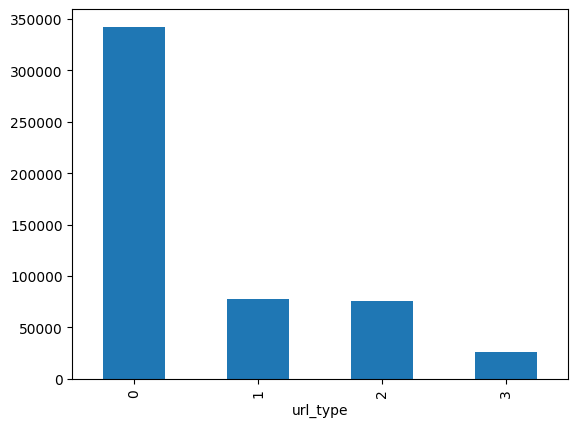

In [ ]:
url_data['url_type'].value_counts().plot(kind='bar')

Number of missing values: 0
% of missing values: 0.0
Data Type: int64
Number of outliers: 9539
% of outliers: 1.8310672939785353
Summary statistics before removing outliers 
 count    520953.00000
mean         57.37923
std          43.60914
min           2.00000
25%          31.00000
50%          45.00000
75%          73.00000
max        2175.00000
Name: url_length, dtype: float64
Summary statistics after removing outliers 
 count    511414.000000
mean         53.581621
std          31.586875
min           2.000000
25%          30.000000
50%          45.000000
75%          71.000000
max         188.000000
Name: url_length, dtype: float64
Kruskal-Wallis H-statistic: nan, p-value: nan
No significant difference in url_length across URL types.
Dunn results : 
                0    1    2              3
0   1.000000e+00  0.0  0.0  1.726668e-124
1   0.000000e+00  1.0  0.0   0.000000e+00
2   0.000000e+00  0.0  1.0   0.000000e+00
3  1.726668e-124  0.0  0.0   1.000000e+00
Cliff's Delta between g

<ipython-input-40-6d3567b80b94>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['url_type'], y=data[column_name], palette='coolwarm')


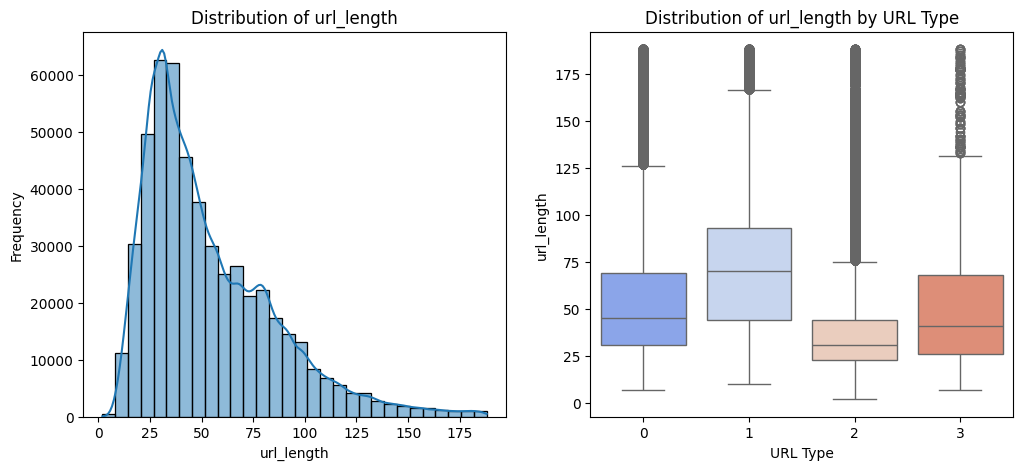



-------------------------------------------


Number of missing values: 0
% of missing values: 0.0
Data Type: int64
Number of outliers: 1932
% of outliers: 1.8625636279500233
Summary statistics before removing outliers 
 count    103728.000000
mean         56.101091
std          41.336308
min           2.000000
25%          28.000000
50%          44.000000
75%          74.000000
max        1633.000000
Name: url_length, dtype: float64
Summary statistics after removing outliers 
 count    101796.000000
mean         52.673415
std          31.451347
min           2.000000
25%          28.000000
50%          43.000000
75%          72.000000
max         180.000000
Name: url_length, dtype: float64
Kruskal-Wallis H-statistic: nan, p-value: nan
No significant difference in url_length across URL types.
Dunn results : 
               0    1    2             3
0  1.000000e+00  0.0  0.0  5.987341e-63
1  0.000000e+00  1.0  0.0  0.000000e+00
2  0.000000e+00  0.0  1.0  0.000000e+00
3  5.987341e-63  

<ipython-input-40-6d3567b80b94>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['url_type'], y=data[column_name], palette='coolwarm')


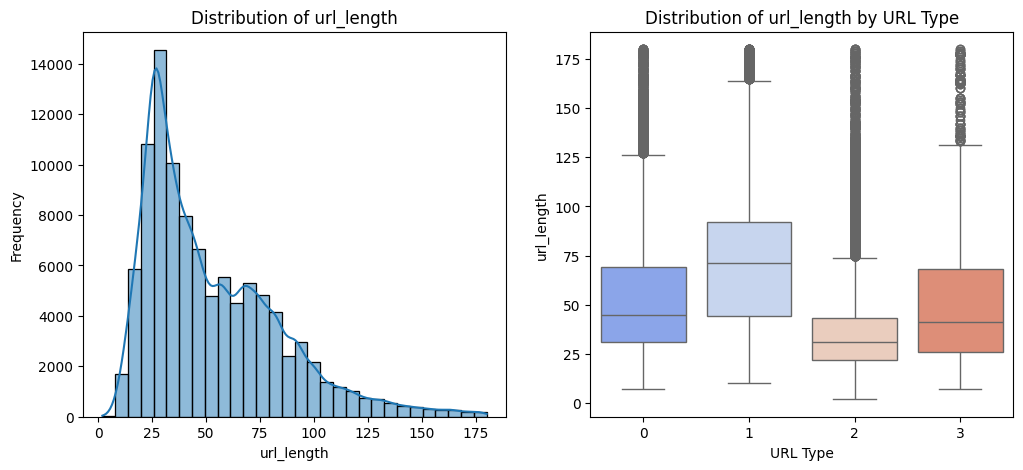

In [ ]:
numerical_variate_analysis(url_data, 'url_length')
print("\n\n-------------------------------------------\n\n")
numerical_variate_analysis(downsampled_url_data, 'url_length')

Number of missing values: 0
% of missing values: 0.0
Data Type: int64
Number of outliers: 7758
% of outliers: 1.489193842822673
Summary statistics before removing outliers 
 count    520953.000000
mean         43.506819
std          31.007031
min           0.000000
25%          24.000000
50%          36.000000
75%          55.000000
max        2141.000000
Name: url_letters, dtype: float64
Summary statistics after removing outliers 
 count    513195.000000
mean         41.259161
std          23.602775
min           0.000000
25%          24.000000
50%          35.000000
75%          54.000000
max         136.000000
Name: url_letters, dtype: float64
Kruskal-Wallis H-statistic: 1136.0000, p-value: 0.0000
There is a significant difference in url_letters across URL types.
Dunn results : 
      0    1             2             3
0  1.0  0.0  0.000000e+00  0.000000e+00
1  0.0  1.0  0.000000e+00  0.000000e+00
2  0.0  0.0  1.000000e+00  1.950307e-37
3  0.0  0.0  1.950307e-37  1.000000e+00
Cliff'

<ipython-input-40-6d3567b80b94>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['url_type'], y=data[column_name], palette='coolwarm')


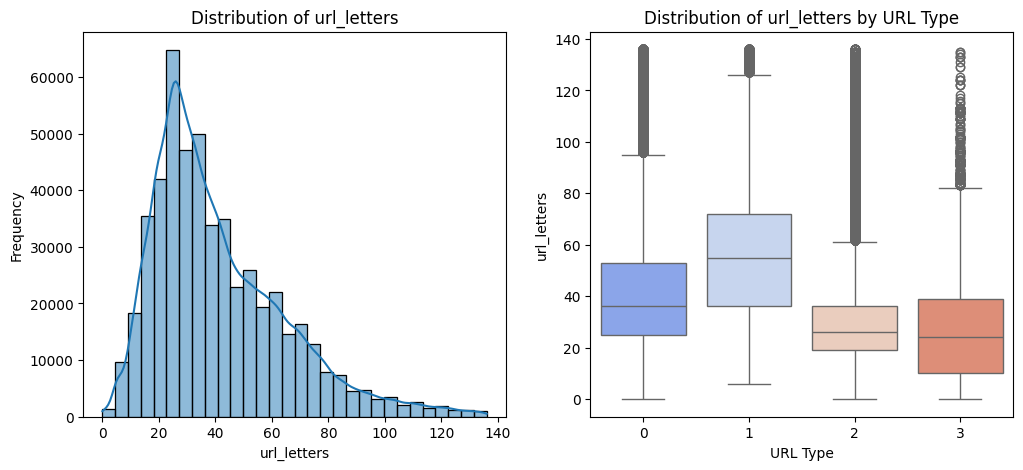



-------------------------------------------


Number of missing values: 0
% of missing values: 0.0
Data Type: int64
Number of outliers: 1712
% of outliers: 1.6504704612062315
Summary statistics before removing outliers 
 count    103728.000000
mean         40.950630
std          31.238398
min           0.000000
25%          21.000000
50%          33.000000
75%          54.000000
max        1296.000000
Name: url_letters, dtype: float64
Summary statistics after removing outliers 
 count    102016.000000
mean         38.647006
std          24.628721
min           0.000000
25%          21.000000
50%          32.000000
75%          53.000000
max         134.000000
Name: url_letters, dtype: float64
Kruskal-Wallis H-statistic: 1089.0000, p-value: 0.0000
There is a significant difference in url_letters across URL types.
Dunn results : 
      0    1             2             3
0  1.0  0.0  0.000000e+00  0.000000e+00
1  0.0  1.0  0.000000e+00  0.000000e+00
2  0.0  0.0  1.000000e+00  7.972631e-

<ipython-input-40-6d3567b80b94>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['url_type'], y=data[column_name], palette='coolwarm')


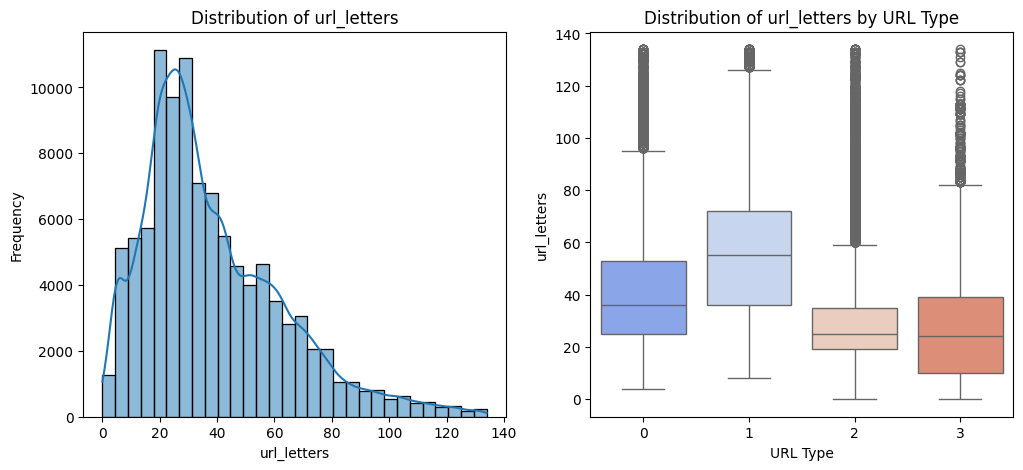

In [ ]:
numerical_variate_analysis(url_data, 'url_letters')
print("\n\n-------------------------------------------\n\n")
numerical_variate_analysis(downsampled_url_data, 'url_letters')

Number of missing values: 0
% of missing values: 0.0
Data Type: int64
Number of outliers: 8981
% of outliers: 1.723955903891522
Summary statistics before removing outliers 
 count    520953.000000
mean          5.529789
std          11.679624
min           0.000000
25%           0.000000
50%           2.000000
75%           7.000000
max        1054.000000
Name: url_digits, dtype: float64
Summary statistics after removing outliers 
 count    511972.000000
mean          4.387220
std           6.510719
min           0.000000
25%           0.000000
50%           2.000000
75%           6.000000
max          40.000000
Name: url_digits, dtype: float64
Kruskal-Wallis H-statistic: 305568.0000, p-value: 0.0000
There is a significant difference in url_digits across URL types.
Dunn results : 
      0    1    2    3
0  1.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0
2  0.0  0.0  1.0  0.0
3  0.0  0.0  0.0  1.0
Cliff's Delta between group 0 and group 1: -0.1003 (negligible)
Cliff's Delta between group 0 and

<ipython-input-40-6d3567b80b94>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['url_type'], y=data[column_name], palette='coolwarm')


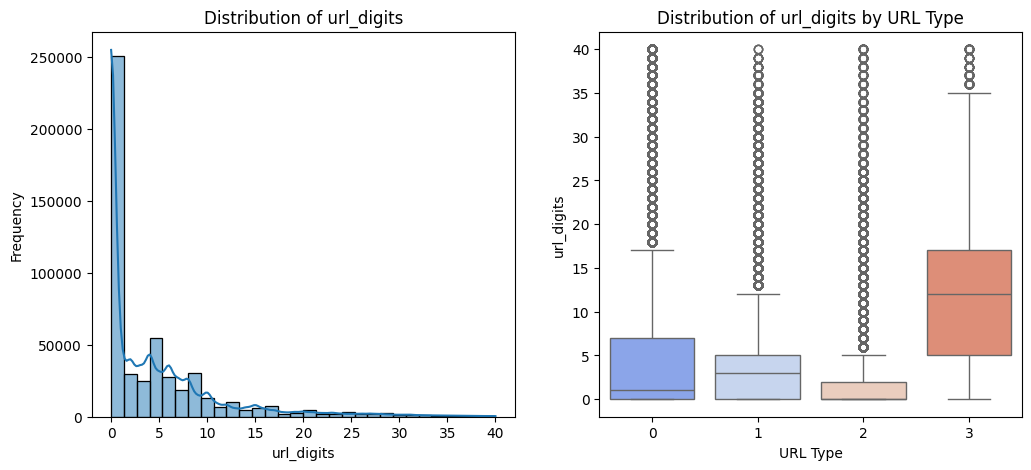



-------------------------------------------


Number of missing values: 0
% of missing values: 0.0
Data Type: int64
Number of outliers: 1245
% of outliers: 1.2002545118000925
Summary statistics before removing outliers 
 count    103728.000000
mean          6.571312
std          10.964239
min           0.000000
25%           0.000000
50%           3.000000
75%           9.000000
max         738.000000
Name: url_digits, dtype: float64
Summary statistics after removing outliers 
 count    102483.000000
mean          5.818663
std           7.707124
min           0.000000
25%           0.000000
50%           3.000000
75%           9.000000
max          39.000000
Name: url_digits, dtype: float64
Kruskal-Wallis H-statistic: 54982.0000, p-value: 0.0000
There is a significant difference in url_digits across URL types.
Dunn results : 
               0             1    2    3
0  1.000000e+00  6.015420e-95  0.0  0.0
1  6.015420e-95  1.000000e+00  0.0  0.0
2  0.000000e+00  0.000000e+00  1.0  0.0

<ipython-input-40-6d3567b80b94>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['url_type'], y=data[column_name], palette='coolwarm')


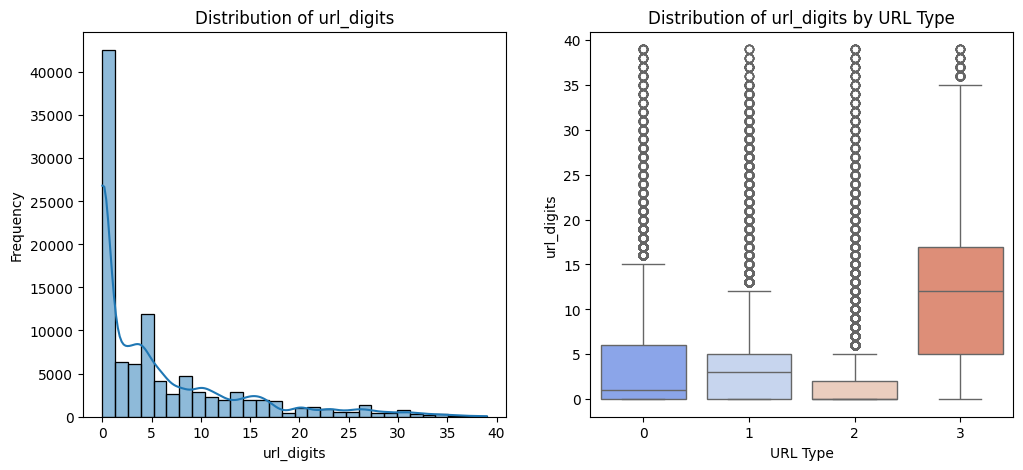

In [ ]:
numerical_variate_analysis(url_data, 'url_digits')
print("\n\n-------------------------------------------\n\n")
numerical_variate_analysis(downsampled_url_data, 'url_digits')

Number of missing values: 0
% of missing values: 0.0
Data Type: int64
Number of outliers: 6357
% of outliers: 1.2202636322278593
Summary statistics before removing outliers 
 count    520953.000000
mean          7.901523
std           7.116743
min           0.000000
25%           4.000000
50%           6.000000
75%          10.000000
max         290.000000
Name: url_special_chars, dtype: float64
Summary statistics after removing outliers 
 count    514596.000000
mean          7.430351
std           5.185845
min           0.000000
25%           4.000000
50%           6.000000
75%          10.000000
max          29.000000
Name: url_special_chars, dtype: float64
Kruskal-Wallis H-statistic: 102706.0000, p-value: 0.0000
There is a significant difference in url_special_chars across URL types.
Dunn results : 
                0    1    2              3
0   1.000000e+00  0.0  0.0  8.572271e-268
1   0.000000e+00  1.0  0.0   0.000000e+00
2   0.000000e+00  0.0  1.0   0.000000e+00
3  8.572271e-268 

<ipython-input-40-6d3567b80b94>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['url_type'], y=data[column_name], palette='coolwarm')


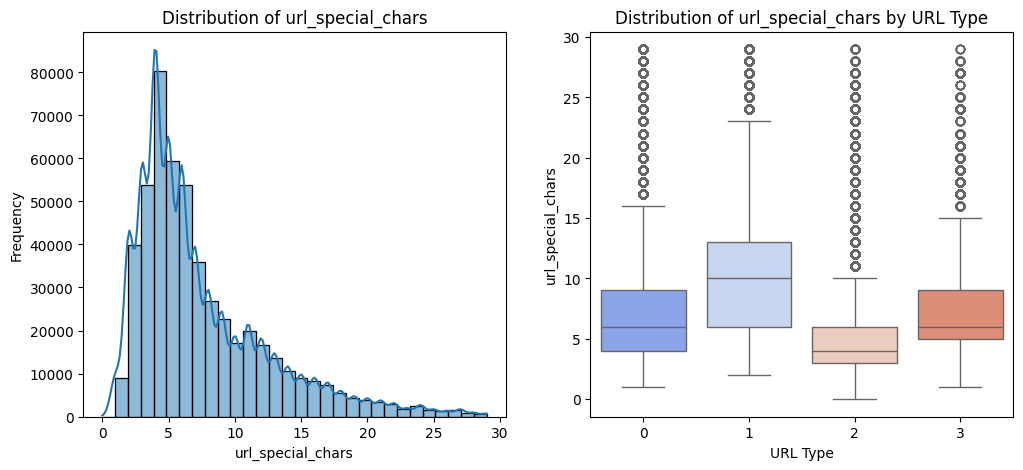



-------------------------------------------


Number of missing values: 0
% of missing values: 0.0
Data Type: int64
Number of outliers: 1829
% of outliers: 1.7632654635199752
Summary statistics before removing outliers 
 count    103728.000000
mean          8.220538
std           6.876053
min           0.000000
25%           4.000000
50%           6.000000
75%          11.000000
max         137.000000
Name: url_special_chars, dtype: float64
Summary statistics after removing outliers 
 count    101899.000000
mean          7.705512
std           5.446606
min           0.000000
25%           4.000000
50%           6.000000
75%          10.000000
max          28.000000
Name: url_special_chars, dtype: float64
Kruskal-Wallis H-statistic: 18249.0000, p-value: 0.0000
There is a significant difference in url_special_chars across URL types.
Dunn results : 
                0    1    2              3
0   1.000000e+00  0.0  0.0  1.600781e-156
1   0.000000e+00  1.0  0.0   0.000000e+00
2   0.000000

<ipython-input-40-6d3567b80b94>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['url_type'], y=data[column_name], palette='coolwarm')


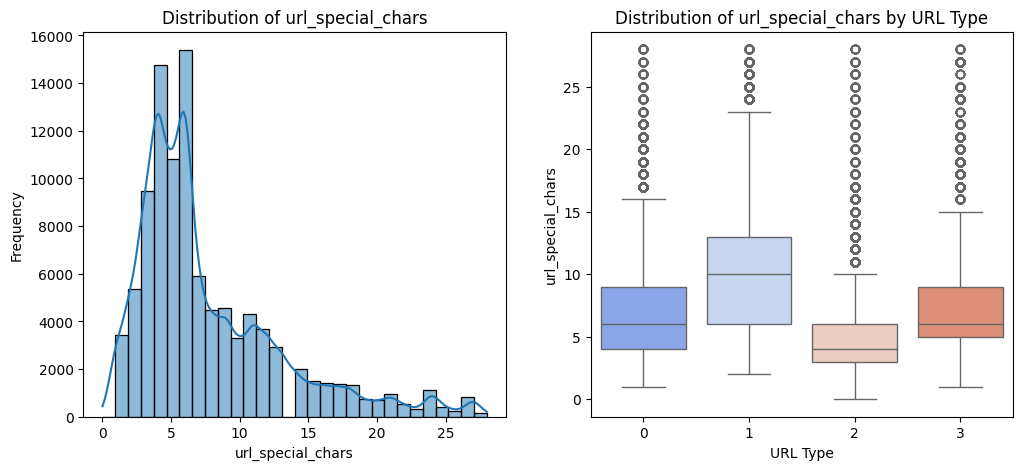

In [ ]:
numerical_variate_analysis(url_data, 'url_special_chars')
print("\n\n-------------------------------------------\n\n")
numerical_variate_analysis(downsampled_url_data, 'url_special_chars')

Number of missing values: 0
% of missing values: 0.0
Data Type: int64
Number of outliers: 7292
% of outliers: 1.3997423951872816
Summary statistics before removing outliers 
 count    520953.000000
mean          3.004924
std           1.399620
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          43.000000
Name: url_subdomain_count, dtype: float64
Summary statistics after removing outliers 
 count    513661.000000
mean          2.889351
std           0.930919
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           7.000000
Name: url_subdomain_count, dtype: float64
Kruskal-Wallis H-statistic: nan, p-value: nan
No significant difference in url_subdomain_count across URL types.
Dunn results : 
      0    1    2    3
0  1.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0
2  0.0  0.0  1.0  0.0
3  0.0  0.0  0.0  1.0
Cliff's Delta between group 0 and group 1: -0.3285 (small)
Cliff's Delta between group 0

<ipython-input-40-6d3567b80b94>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['url_type'], y=data[column_name], palette='coolwarm')


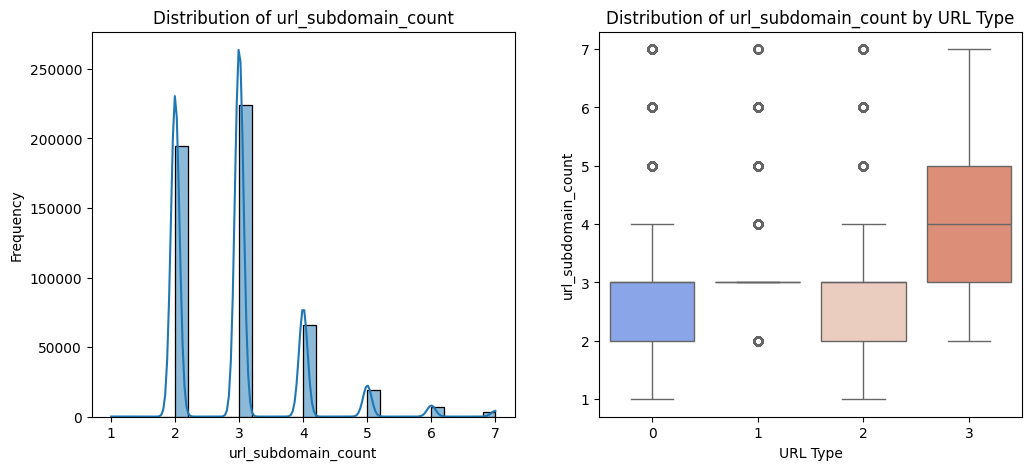



-------------------------------------------


Number of missing values: 0
% of missing values: 0.0
Data Type: int64
Number of outliers: 1034
% of outliers: 0.9968378836958199
Summary statistics before removing outliers 
 count    103728.000000
mean          3.207581
std           1.291950
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          43.000000
Name: url_subdomain_count, dtype: float64
Summary statistics after removing outliers 
 count    102694.000000
mean          3.133474
std           1.020313
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           7.000000
Name: url_subdomain_count, dtype: float64
Kruskal-Wallis H-statistic: nan, p-value: nan
No significant difference in url_subdomain_count across URL types.
Dunn results : 
                0              1              2    3
0   1.000000e+00   0.000000e+00  5.451125e-124  0.0
1   0.000000e+00   1.000000e+00  4.224773e-278

<ipython-input-40-6d3567b80b94>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['url_type'], y=data[column_name], palette='coolwarm')


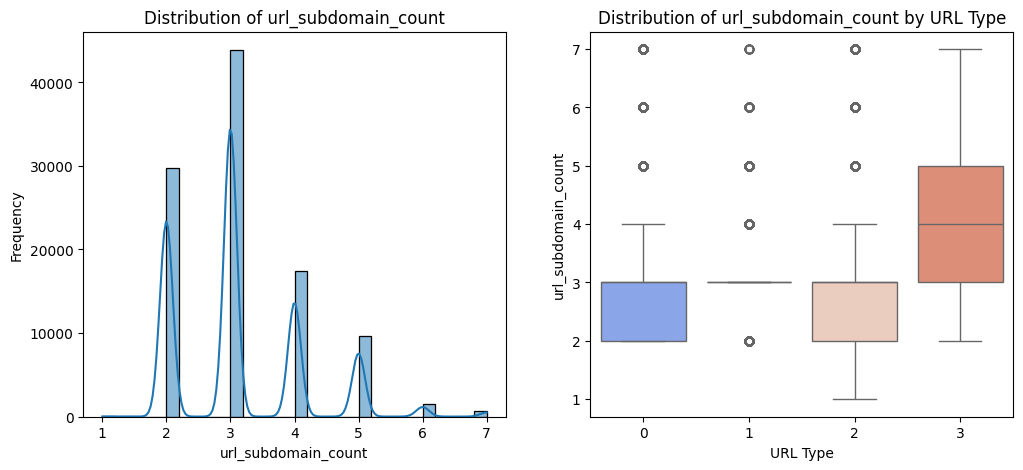

In [ ]:
numerical_variate_analysis(url_data, 'url_subdomain_count')
print("\n\n-------------------------------------------\n\n")
numerical_variate_analysis(downsampled_url_data, 'url_subdomain_count')

Number of missing values: 0
% of missing values: 0.0
Data Type: int64
Number of outliers: 6956
% of outliers: 1.3352452140596176
Summary statistics before removing outliers 
 count    520953.000000
mean          3.373423
std           1.647852
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          40.000000
Name: url_directories_count, dtype: float64
Summary statistics after removing outliers 
 count    513997.000000
mean          3.280657
std           1.433496
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           8.000000
Name: url_directories_count, dtype: float64
Kruskal-Wallis H-statistic: nan, p-value: nan
No significant difference in url_directories_count across URL types.
Dunn results : 
      0              1              2              3
0  1.0   0.000000e+00   0.000000e+00   0.000000e+00
1  0.0   1.000000e+00  7.469427e-284  1.244917e-271
2  0.0  7.469427e-284   1.000000e+00

<ipython-input-40-6d3567b80b94>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['url_type'], y=data[column_name], palette='coolwarm')


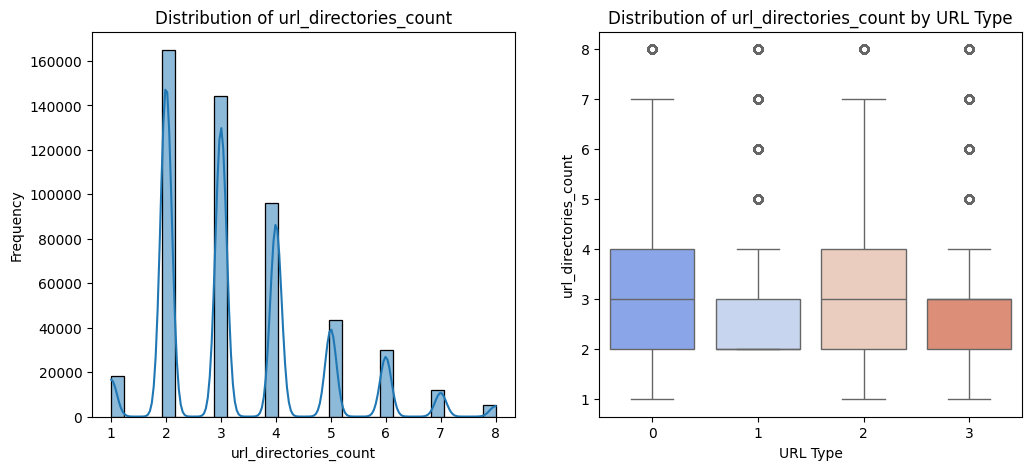



-------------------------------------------


Number of missing values: 0
% of missing values: 0.0
Data Type: int64
Number of outliers: 1857
% of outliers: 1.790259139287367
Summary statistics before removing outliers 
 count    103728.000000
mean          3.148321
std           1.570621
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          32.000000
Name: url_directories_count, dtype: float64
Summary statistics after removing outliers 
 count    101871.000000
mean          3.038166
std           1.330198
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           7.000000
Name: url_directories_count, dtype: float64
Kruskal-Wallis H-statistic: nan, p-value: nan
No significant difference in url_directories_count across URL types.
Dunn results : 
                0              1             2              3
0   1.000000e+00   0.000000e+00  0.000000e+00  1.194077e-193
1   0.000000e+00   1.00

<ipython-input-40-6d3567b80b94>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['url_type'], y=data[column_name], palette='coolwarm')


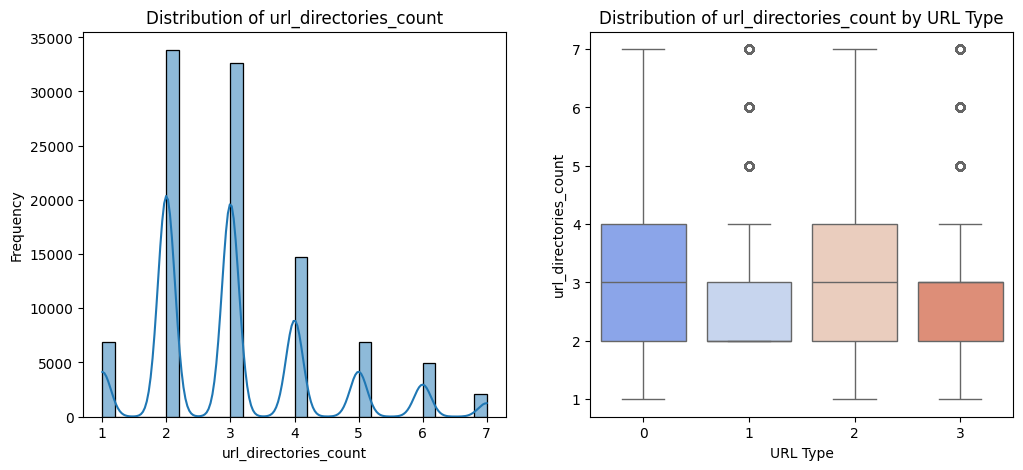

In [ ]:
numerical_variate_analysis(url_data, 'url_directories_count')
print("\n\n-------------------------------------------\n\n")
numerical_variate_analysis(downsampled_url_data, 'url_directories_count')

Number of missing values: 0
% of missing values: 0.0
Data Type: int64
Number of outliers: 9850
% of outliers: 1.8907655777008676
Summary statistics before removing outliers 
 count    520953.000000
mean          2.604183
std           1.517971
min           2.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          53.000000
Name: url_parameters_count, dtype: float64
Summary statistics after removing outliers 
 count    511103.000000
mean          2.469279
std           1.128273
min           2.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: url_parameters_count, dtype: float64
Kruskal-Wallis H-statistic: nan, p-value: nan
No significant difference in url_parameters_count across URL types.
Dunn results : 
               0    1             2             3
0  1.000000e+00  0.0  0.000000e+00  1.108138e-57
1  0.000000e+00  1.0  0.000000e+00  0.000000e+00
2  0.000000e+00  0.0  1.000000e+00  5.284684e-27

<ipython-input-40-6d3567b80b94>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['url_type'], y=data[column_name], palette='coolwarm')


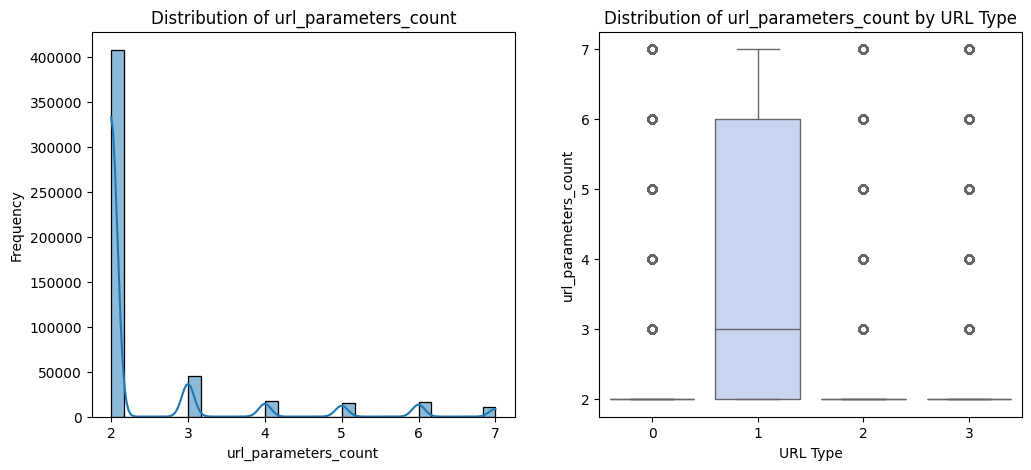



-------------------------------------------


Number of missing values: 0
% of missing values: 0.0
Data Type: int64
Number of outliers: 1621
% of outliers: 1.5627410149622087
Summary statistics before removing outliers 
 count    103728.000000
mean          2.802589
std           1.805228
min           2.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          24.000000
Name: url_parameters_count, dtype: float64
Summary statistics after removing outliers 
 count    102107.000000
mean          2.674704
std           1.465728
min           2.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           8.000000
Name: url_parameters_count, dtype: float64
Kruskal-Wallis H-statistic: nan, p-value: nan
No significant difference in url_parameters_count across URL types.
Dunn results : 
               0    1             2             3
0  1.000000e+00  0.0  6.024576e-78  2.187876e-19
1  0.000000e+00  1.0  0.000000e+00  0.000000e+00


<ipython-input-40-6d3567b80b94>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['url_type'], y=data[column_name], palette='coolwarm')


Cliff's Delta between group 2 and group 3: -0.0349 (negligible)


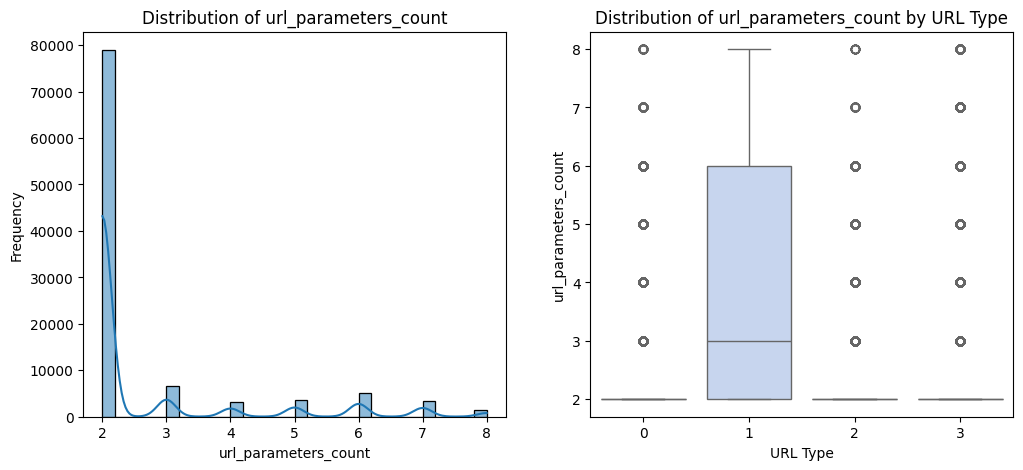

In [ ]:
numerical_variate_analysis(url_data, 'url_parameters_count')
print("\n\n-------------------------------------------\n\n")
numerical_variate_analysis(downsampled_url_data, 'url_parameters_count')

Number of missing values: 0
% of missing values: 0.0
Data Type: int64
Number of outliers: 6810
% of outliers: 1.307219653212478
Summary statistics before removing outliers 
 count    520953.000000
mean         22.870929
std           7.970808
min           2.000000
25%          17.000000
50%          22.000000
75%          27.000000
max         221.000000
Name: url_unique_characters_count, dtype: float64
Summary statistics after removing outliers 
 count    514143.000000
mean         22.408536
std           6.836046
min           2.000000
25%          17.000000
50%          22.000000
75%          27.000000
max          46.000000
Name: url_unique_characters_count, dtype: float64
Kruskal-Wallis H-statistic: nan, p-value: nan
No significant difference in url_unique_characters_count across URL types.
Dunn results : 
                0    1    2              3
0   1.000000e+00  0.0  0.0  7.617593e-252
1   0.000000e+00  1.0  0.0   0.000000e+00
2   0.000000e+00  0.0  1.0   0.000000e+00
3  7.61

<ipython-input-40-6d3567b80b94>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['url_type'], y=data[column_name], palette='coolwarm')


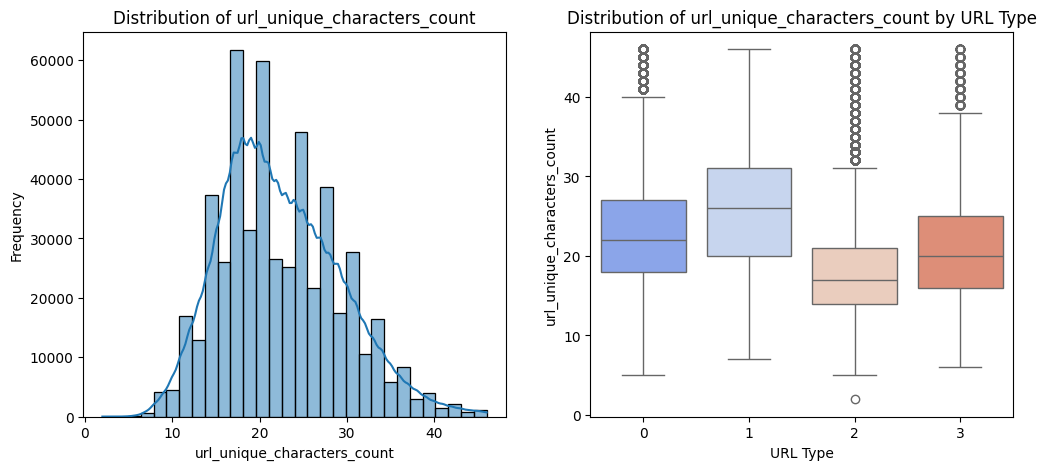



-------------------------------------------


Number of missing values: 0
% of missing values: 0.0
Data Type: int64
Number of outliers: 1399
% of outliers: 1.3487197285207466
Summary statistics before removing outliers 
 count    103728.000000
mean         22.509804
std           8.170527
min           2.000000
25%          17.000000
50%          21.000000
75%          27.000000
max         181.000000
Name: url_unique_characters_count, dtype: float64
Summary statistics after removing outliers 
 count    102329.000000
mean         22.038347
std           7.095144
min           2.000000
25%          17.000000
50%          21.000000
75%          27.000000
max          47.000000
Name: url_unique_characters_count, dtype: float64
Kruskal-Wallis H-statistic: nan, p-value: nan
No significant difference in url_unique_characters_count across URL types.
Dunn results : 
                0    1    2              3
0   1.000000e+00  0.0  0.0  5.098611e-126
1   0.000000e+00  1.0  0.0   0.000000e+00


<ipython-input-40-6d3567b80b94>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['url_type'], y=data[column_name], palette='coolwarm')


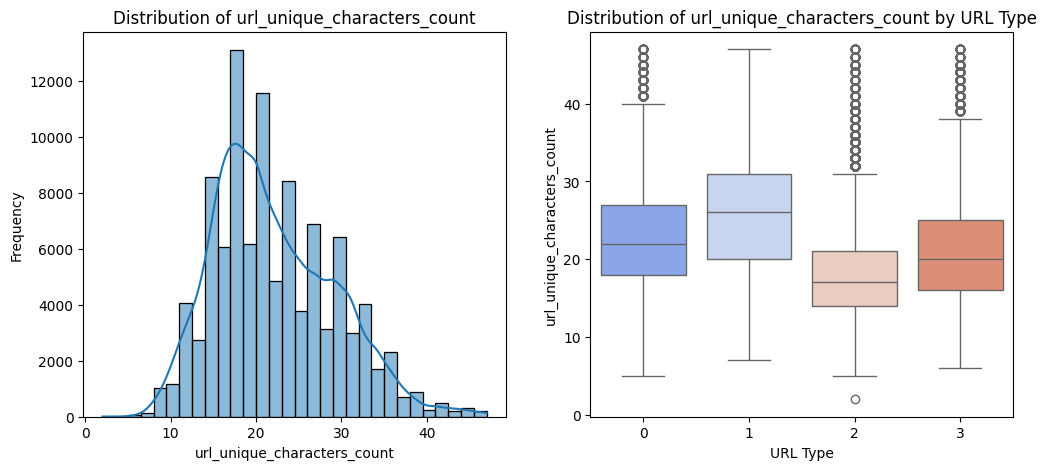

In [ ]:
numerical_variate_analysis(url_data, 'url_unique_characters_count')
print("\n\n-------------------------------------------\n\n")
numerical_variate_analysis(downsampled_url_data, 'url_unique_characters_count')

Analyzing relationship between has_ip_address and url_type

Contingency Table:
 url_type             0      1      2      3
has_ip_address                             
0               342382  77238  75099  17523
1                   65      0    237   8409

Pairwise Post-hoc Chi-Square Tests (Bonferroni Adjusted):
3 vs 0: Adjusted p-value = 0.0000
  Significant difference.
3 vs 2: Adjusted p-value = 0.0000
  Significant difference.
3 vs 1: Adjusted p-value = 0.0000
  Significant difference.
0 vs 2: Adjusted p-value = 0.0000
  Significant difference.
0 vs 1: Adjusted p-value = 0.0015
  Significant difference.
2 vs 1: Adjusted p-value = 0.0000
  Significant difference.
Chi-Square Statistic: 157033.5643, p-value: 0.0000, Degrees of Freedom: 3
There is a significant association between the two categorical variables.
Cramér's V: 0.5490


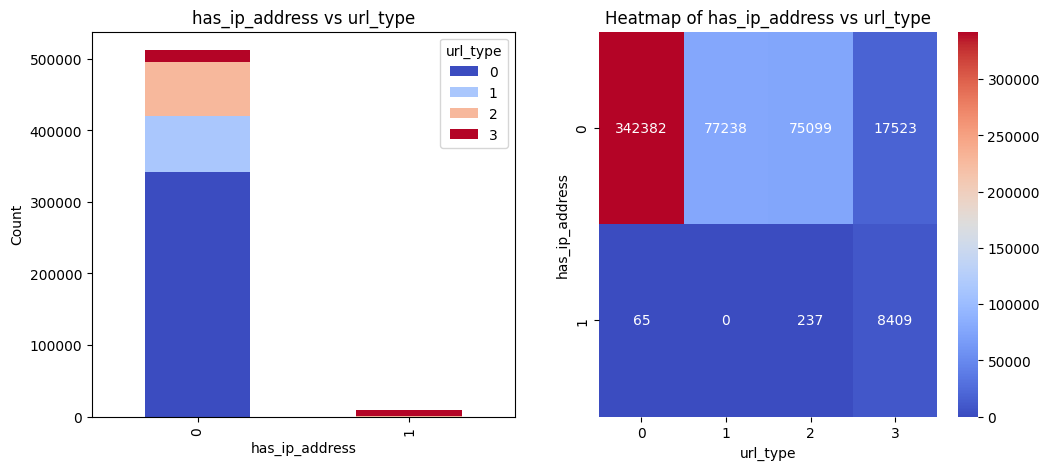



-------------------------------------------


Analyzing relationship between has_ip_address and url_type

Contingency Table:
 url_type            0      1      2      3
has_ip_address                            
0               25928  25932  25850  17523
1                   4      0     82   8409

Pairwise Post-hoc Chi-Square Tests (Bonferroni Adjusted):
0 vs 1: Adjusted p-value = 0.8016
0 vs 2: Adjusted p-value = 0.0000
  Significant difference.
0 vs 3: Adjusted p-value = 0.0000
  Significant difference.
1 vs 2: Adjusted p-value = 0.0000
  Significant difference.
1 vs 3: Adjusted p-value = 0.0000
  Significant difference.
2 vs 3: Adjusted p-value = 0.0000
  Significant difference.
Chi-Square Statistic: 27016.1986, p-value: 0.0000, Degrees of Freedom: 3
There is a significant association between the two categorical variables.
Cramér's V: 0.5103


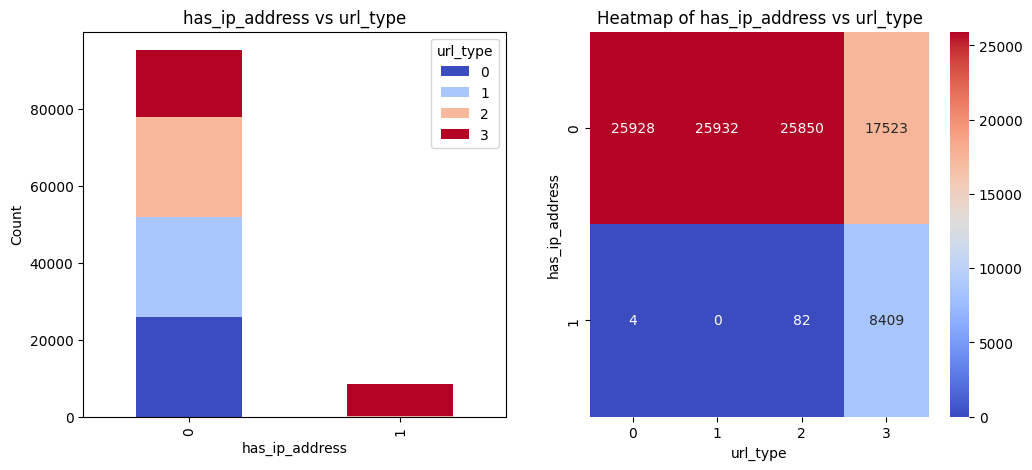

In [ ]:
categorical_variate_analysis(url_data, 'has_ip_address', 'url_type')
print("\n\n-------------------------------------------\n\n")
categorical_variate_analysis(downsampled_url_data, 'has_ip_address', 'url_type')

Analyzing relationship between has_hex_encoding and url_type

Contingency Table:
 url_type               0      1      2      3
has_hex_encoding                             
0                 326789  76258  74319  22170
1                  15658    980   1017   3762

Pairwise Post-hoc Chi-Square Tests (Bonferroni Adjusted):
3 vs 0: Adjusted p-value = 0.0000
  Significant difference.
3 vs 2: Adjusted p-value = 0.0000
  Significant difference.
3 vs 1: Adjusted p-value = 0.0000
  Significant difference.
0 vs 2: Adjusted p-value = 0.0000
  Significant difference.
0 vs 1: Adjusted p-value = 0.0000
  Significant difference.
2 vs 1: Adjusted p-value = 1.0000
Chi-Square Statistic: 10334.2962, p-value: 0.0000, Degrees of Freedom: 3
There is a significant association between the two categorical variables.
Cramér's V: 0.1408


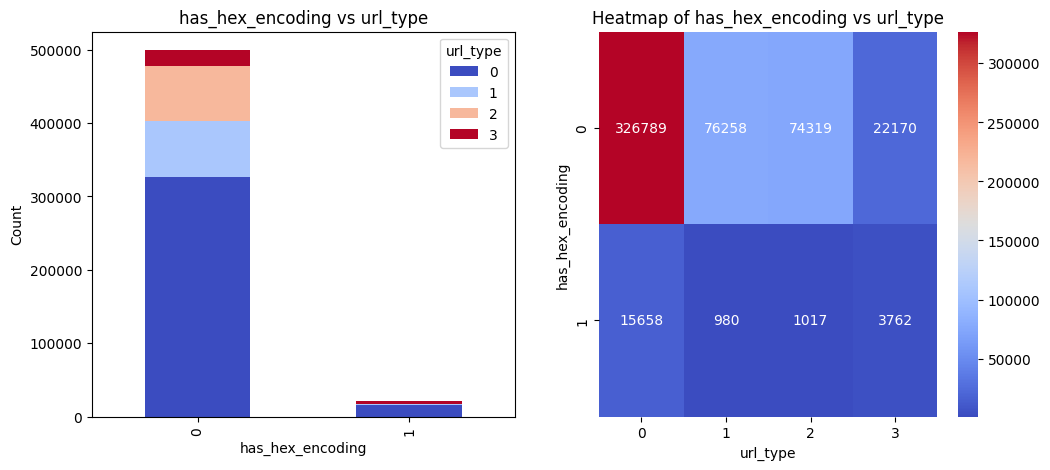



-------------------------------------------


Analyzing relationship between has_hex_encoding and url_type

Contingency Table:
 url_type              0      1      2      3
has_hex_encoding                            
0                 24754  25590  25602  22170
1                  1178    342    330   3762

Pairwise Post-hoc Chi-Square Tests (Bonferroni Adjusted):
0 vs 1: Adjusted p-value = 0.0000
  Significant difference.
0 vs 2: Adjusted p-value = 0.0000
  Significant difference.
0 vs 3: Adjusted p-value = 0.0000
  Significant difference.
1 vs 2: Adjusted p-value = 1.0000
1 vs 3: Adjusted p-value = 0.0000
  Significant difference.
2 vs 3: Adjusted p-value = 0.0000
  Significant difference.
Chi-Square Statistic: 5947.2497, p-value: 0.0000, Degrees of Freedom: 3
There is a significant association between the two categorical variables.
Cramér's V: 0.2394


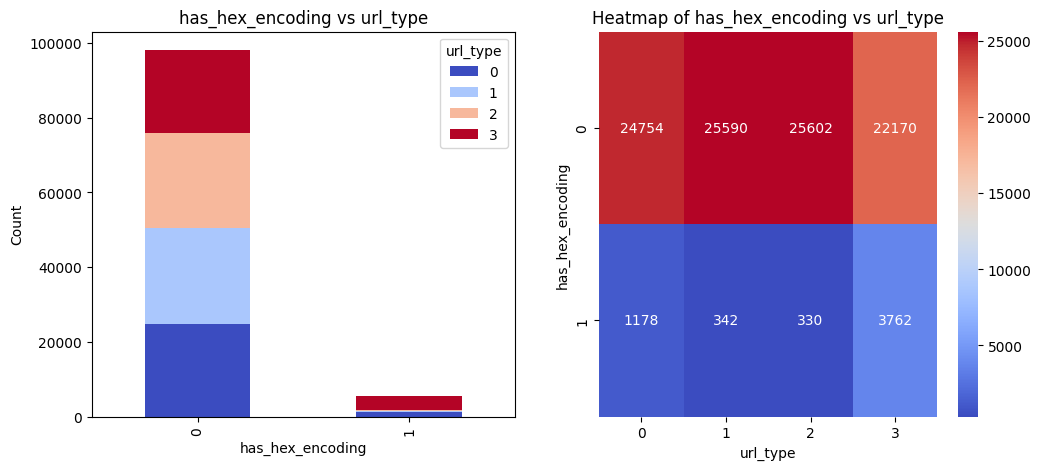

In [ ]:
categorical_variate_analysis(url_data, 'has_hex_encoding', 'url_type')
print("\n\n-------------------------------------------\n\n")
categorical_variate_analysis(downsampled_url_data, 'has_hex_encoding', 'url_type')

## Model Development

In [14]:
save_data = data.copy()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = data.drop(['url', 'type', 'domain'], axis=1)
X = data.drop(['url_type'], axis=1)
y = data['url_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['has_ip_address', 'has_hex_encoding', 'is_shortened_url']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), [col for col in X_train.columns if col not in categorical_features]),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

model = LogisticRegression()
model.fit(X_train_preprocessed, y_train)

y_pred = model.predict(X_test_preprocessed)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Model Accuracy: 0.727347415136787
Confusion Matrix:
 [[83568  1666   433   111]
 [10593  8467    28    16]
 [18141   312   310    73]
 [ 3882   246     9  2384]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.97      0.83     85778
           1       0.79      0.44      0.57     19104
           2       0.40      0.02      0.03     18836
           3       0.92      0.37      0.52      6521

    accuracy                           0.73    130239
   macro avg       0.71      0.45      0.49    130239
weighted avg       0.69      0.73      0.66    130239

